In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import sys
sys.path.append('../../arxiv_cs/')

%load_ext autoreload
%autoreload 2

In [3]:
import json
import pandas as pd
import gzip
from pathlib import Path
from collections import Counter
import datetime
import re
import matplotlib.pyplot as plt

In [4]:
DATA_CLEAN_PATH = Path("../../data/clean")

In [5]:
df = pd.read_json(DATA_CLEAN_PATH / "arxiv_cs.json.gz")
# pd.to_datetime(df['date']).apply(lambda x: x.date())

df.head()

,id,title,abstract,categories
0,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pe...",math.CO cs.CG
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldmann...",quant-ph cs.IT math.IT
2,0704.0047,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is d...,cs.NE cs.AI
3,0704.0050,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emiss...,cs.NE cs.AI
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Viterb...",cs.DS


#### Size, duplicates and Nan's

In [6]:
df.id.size, sum(df.duplicated(['id']))

(239859, 0)

In [7]:
df.isna().any()

id            False
title         False
abstract      False
categories    False
dtype: bool

In [8]:
df.describe()

,id,title,abstract,categories
count,239859,239859,239859,239859
unique,239859,239859,239859,20491
top,1810.00027,Oscillations and Random Perturbations of a Fit...,The trade-off between language expressiveness ...,cs.CV
freq,1,1,1,19492


In [9]:
df.head()

,id,title,abstract,categories
0,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pe...",math.CO cs.CG
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldmann...",quant-ph cs.IT math.IT
2,0704.0047,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is d...,cs.NE cs.AI
3,0704.0050,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emiss...,cs.NE cs.AI
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Viterb...",cs.DS


In [10]:
df['primary_cat'] = df.categories.map(lambda x: x.split()[0])

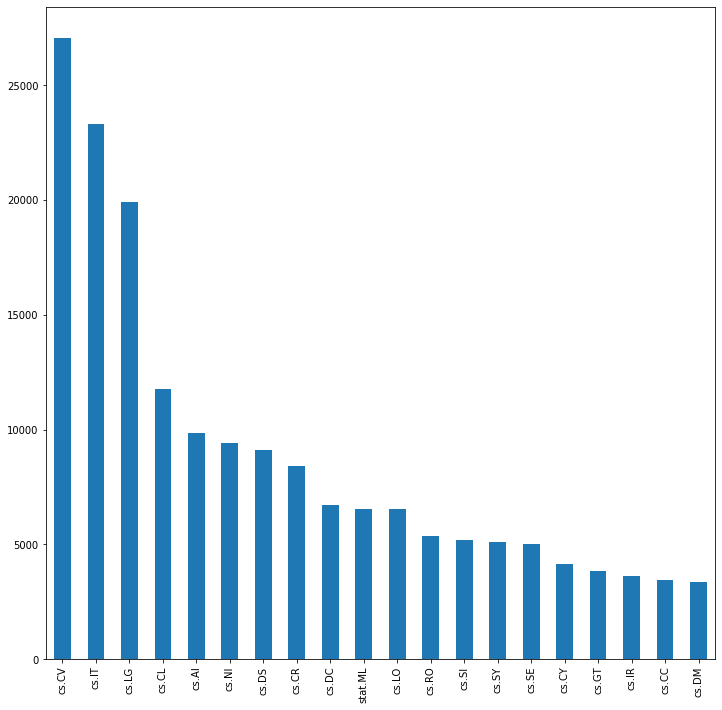

In [11]:
df.primary_cat.value_counts().nlargest(20).plot(kind='bar', figsize=(12, 12))